# Notebook 2 d'essai

Dans ce notebook, nous allons tester plusieurs approche de modélisation. Nous comparons ces algorithmes et sélectionnerons le meilleur.

# Import Bibliotéque

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Elbow pour choisir le nombre classe
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
##from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
import yellowbrick
import time

from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn import decomposition

pd.set_option("display.max_rows", 101)
pd.options.display.max_columns = 999

# Import Données

In [2]:
Data = pd.read_excel("data_projet_4.xlsx",sheet_name = 'data_cluster')

In [3]:
Data.columns

Index(['Unnamed: 0', 'order_id', 'nb_days_before_delivered', 'Recency',
       'Frequency', 'Payment by customer', 'review_score'],
      dtype='object')

In [4]:
Data.head(5)

,Unnamed: 0,order_id,nb_days_before_delivered,Recency,Frequency,Payment by customer,review_score
0,0,e481f51cbdc54678b7cc49136f2d6af7,8,332,2,82.82,4.0
1,1,53cdb2fc8bc7dce0b6741e2150273451,12,36,1,141.46,4.0
2,2,47770eb9100c2d0c44946d9cf07ec65d,9,22,1,179.12,5.0
3,3,949d5b44dbf5de918fe9c16f97b45f8a,13,284,1,72.20,5.0
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2,197,1,28.62,5.0


# Milestone 3 : Élaboration d’un modèle de clustering

On crée des variables Log de la recency et des paiements par clients.

In [5]:
Data.to_excel("output.xlsx")  

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94995 entries, 0 to 94994
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                94995 non-null  int64  
 1   order_id                  94995 non-null  object 
 2   nb_days_before_delivered  94995 non-null  int64  
 3   Recency                   94995 non-null  int64  
 4   Frequency                 94995 non-null  int64  
 5   Payment by customer       94995 non-null  float64
 6   review_score              94995 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 5.1+ MB


## Data test

## Sans standard Scalar

On cherche à comparer les données avec un standard scalar avec celles qui n'ont pas de standard scaler.

In [7]:
Data.columns

Index(['Unnamed: 0', 'order_id', 'nb_days_before_delivered', 'Recency',
       'Frequency', 'Payment by customer', 'review_score'],
      dtype='object')

In [8]:
col_select = [
              'Recency', 
              'Frequency', 
              'Payment by customer', 
              'review_score', 
              'nb_days_before_delivered'
               ]

On calcule la moyenne et la standard déviation de nos données.

In [9]:
Data_select = Data[col_select]
X = Data_select.copy()
X_scaled = X.copy()
Data_RFM_normalized = pd.DataFrame(X_scaled, columns = Data_select.columns)
print("Mean:\n" ,Data_RFM_normalized.mean(axis=0).round(2))
print("\n")
print("Standard Deviation:\n ",Data_RFM_normalized.std(axis=0).round(2))

Mean:
 Recency                     237.09
Frequency                     1.07
Payment by customer         168.13
review_score                  4.17
nb_days_before_delivered     11.23
dtype: float64


Standard Deviation:
  Recency                     152.48
Frequency                     0.28
Payment by customer         213.75
review_score                  1.27
nb_days_before_delivered      7.93
dtype: float64


In [10]:
pca = decomposition.PCA(n_components=5)
PCA_RFM = pca.fit_transform(X_scaled)
pcs = pca.components_
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


[6.62221934e-01 3.36857063e-01 8.99066457e-04 2.08036750e-05
 1.13311867e-06]
0.9999999999999999


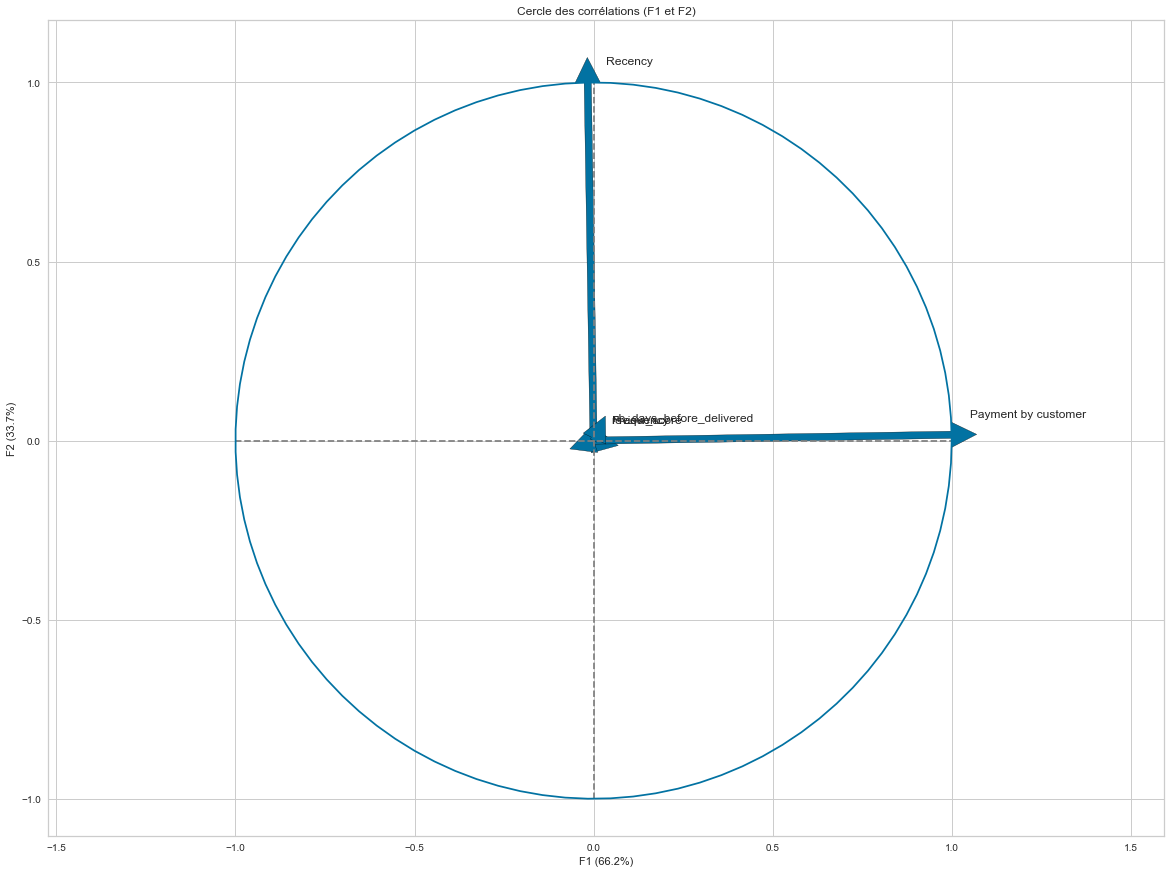

In [11]:
x, y = 0,1

features = Data_RFM_normalized.columns
fig, ax = plt.subplots(figsize=(20, 15))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

Selon l'axe F1, le price et le payment by customer sans très corrélées. De plus les deux variables expliques une grande partie de la variance.

Selon l'axe F2, la recency explique la totalité de la variance.

## Avec standard Scalar

On utilise maintenant le standar scaler. Il va permettre de rendre les données homogènes.

In [12]:
Data_select = Data[col_select]
X = Data_select.copy()
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
X_scaled = X.copy()
Data_RFM_normalized_SS = pd.DataFrame(X_scaled, columns = Data_select.columns)
print("Mean:\n" ,Data_RFM_normalized_SS.mean(axis=0).round(2))
print("\n")
print("Standard Deviation:\n ",Data_RFM_normalized_SS.std(axis=0).round(2))

Mean:
 Recency                     237.09
Frequency                     1.07
Payment by customer         168.13
review_score                  4.17
nb_days_before_delivered     11.23
dtype: float64


Standard Deviation:
  Recency                     152.48
Frequency                     0.28
Payment by customer         213.75
review_score                  1.27
nb_days_before_delivered      7.93
dtype: float64


In [13]:
pca = decomposition.PCA(n_components=5)
PCA_RFM = pca.fit_transform(X_scaled)
pcs = pca.components_
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


[6.62221934e-01 3.36857063e-01 8.99066457e-04 2.08036750e-05
 1.13311867e-06]
0.9999999999999999


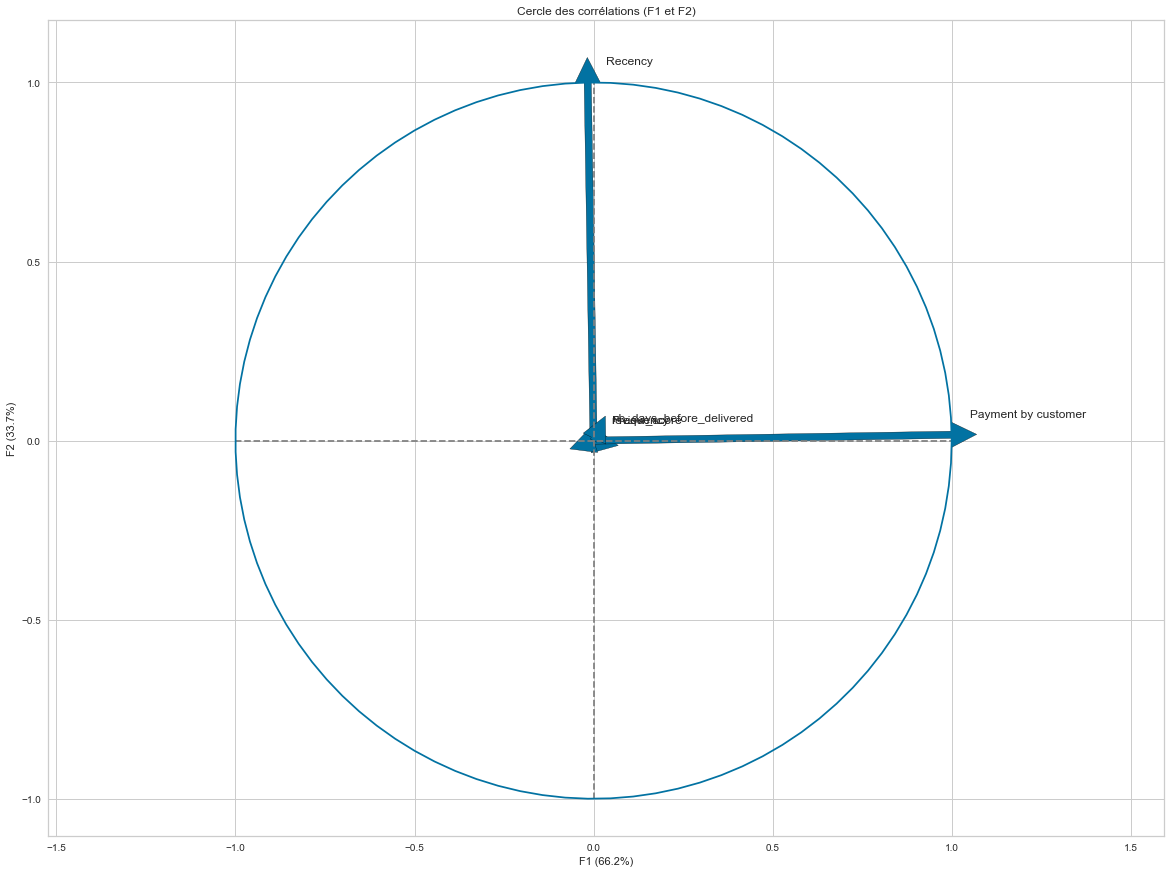

In [14]:
x, y =  0,1

features = Data_RFM_normalized_SS.columns
fig, ax = plt.subplots(figsize=(20, 15))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

On n'a pas de grosse différence entre les données. Partira sur les données avec le standard scaler.

# Test Kmeans

Après avoir effectué une ACP, on conclue que seulement 3 composantes sont nécessaires pour effectuer nos clusters. On testera avec 3 composantes et plus de 3 clusters.

## Cluster 3 F RFM 

On fait un premier test avec 3 composants pour notre modèle.

In [15]:
colonnes_RFM = [
                'Recency', 
                'Frequency', 
                'Payment by customer'
]

In [16]:
Data_RFM = Data[colonnes_RFM ]

In [17]:
def std_scaler (df, col) :
    """
    Fonction qui retravaille les données.
    """
    X = df[col].copy()
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)
    X_scaled = X.copy()
    Data_normalized = pd.DataFrame(X_scaled, columns=col )
    print("Mean:\n" ,Data_normalized.mean(axis=0).round(2))
    print("\n")
    print("Standard Deviation:\n ",Data_normalized.std(axis=0).round(2))
    
    pca = decomposition.PCA(n_components = len(col))
    PCA_RFM = pca.fit_transform(X_scaled)
    pcs = pca.components_
    print("==========================")
    print("Explaind Variance")
    print(pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_.sum())

    
    return Data_normalized, pca, pcs, PCA_RFM

In [18]:
Data_RFM_normalized, pca, pcs, PCA_RFM = std_scaler(Data_RFM, colonnes_RFM)

Mean:
 Recency                237.09
Frequency                1.07
Payment by customer    168.13
dtype: float64


Standard Deviation:
  Recency                152.48
Frequency                0.28
Payment by customer    213.75
dtype: float64
Explaind Variance
[6.62836884e-01 3.37161981e-01 1.13479281e-06]
1.0


In [19]:
# Elbow pour choisir le nombre classe
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer


In [20]:
def func_clustering (df, Model, nb_k) :
    
    """
    Fonction qui permet d'utiliser la méthode du coude pour visualiser le nombre de clusters idéal.
    """
    
    model = Model
    visualizer = KElbowVisualizer(model, k= nb_k, timings=False)
    visualizer.fit(df )        
    visualizer.show() 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\clust

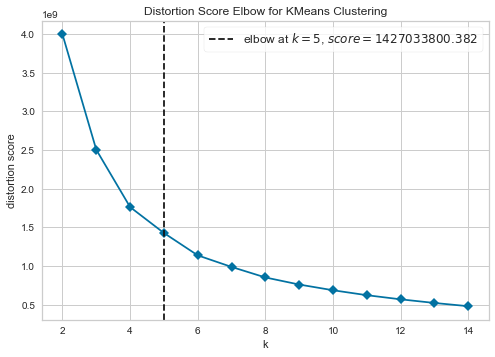

In [21]:
model_KM = KMeans(random_state = 0)
func_clustering (Data_RFM_normalized, model_KM, (2, 15))

Le nombre théorique de cluster à utiliser est de K=5.

In [22]:
import time

In [23]:
def Vizualisation_KM (df, nb_clust, pca_clust, col_1,col_2) : 
    
    """
    Fonction qui effectue la modélisation de notre modèle de clustering. 
    Elle nous renvoie les labels de notre modèle.
    """
    
    # Fitting KMeans
    model = KMeans(n_clusters= nb_clust, random_state=0)
    
    # Prediction
    training_start = time.perf_counter()
    label = model.fit_predict(df )
    training_end = time.perf_counter() 
    centroids = model.cluster_centers_
    u_labels = np.unique(label)
    print("le temps du fit est",training_end- training_start, "s")

    # Graphical representation
    # Graphical representation
    plt.figure(figsize=(20, 15))
    for i in u_labels:
        plt.scatter(pca_clust[label==i, col_1], pca_clust[label==i, col_2], label = i)
    plt.legend()
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.title('Représentation des clusters du K-Means')
    plt.show()
    
    df_PCA = pd.DataFrame (pca_clust)
    df["N° Cluster"] = model.labels_
    
    data_clusters = df.groupby('N° Cluster').agg({'Recency' : "mean", 'Frequency' : "mean",'Payment by customer': "mean"}).round(2)
    data_clusters.reset_index()
    
    Data_custer_count= pd.DataFrame(data = df["N° Cluster"].value_counts()).reset_index()
    Data_custer_count= Data_custer_count.rename(columns = {"index":"N° Cluster","N° Cluster":"Population"})
    sns.set(rc = {'figure.figsize':(20,15)})
    plt.pie(x = "Population", data= Data_custer_count,autopct="%.1f%%", labels = Data_custer_count.index )
    plt.legend()
   

    return df, data_clusters, Data_custer_count

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


le temps du fit est 0.7235948000000008 s


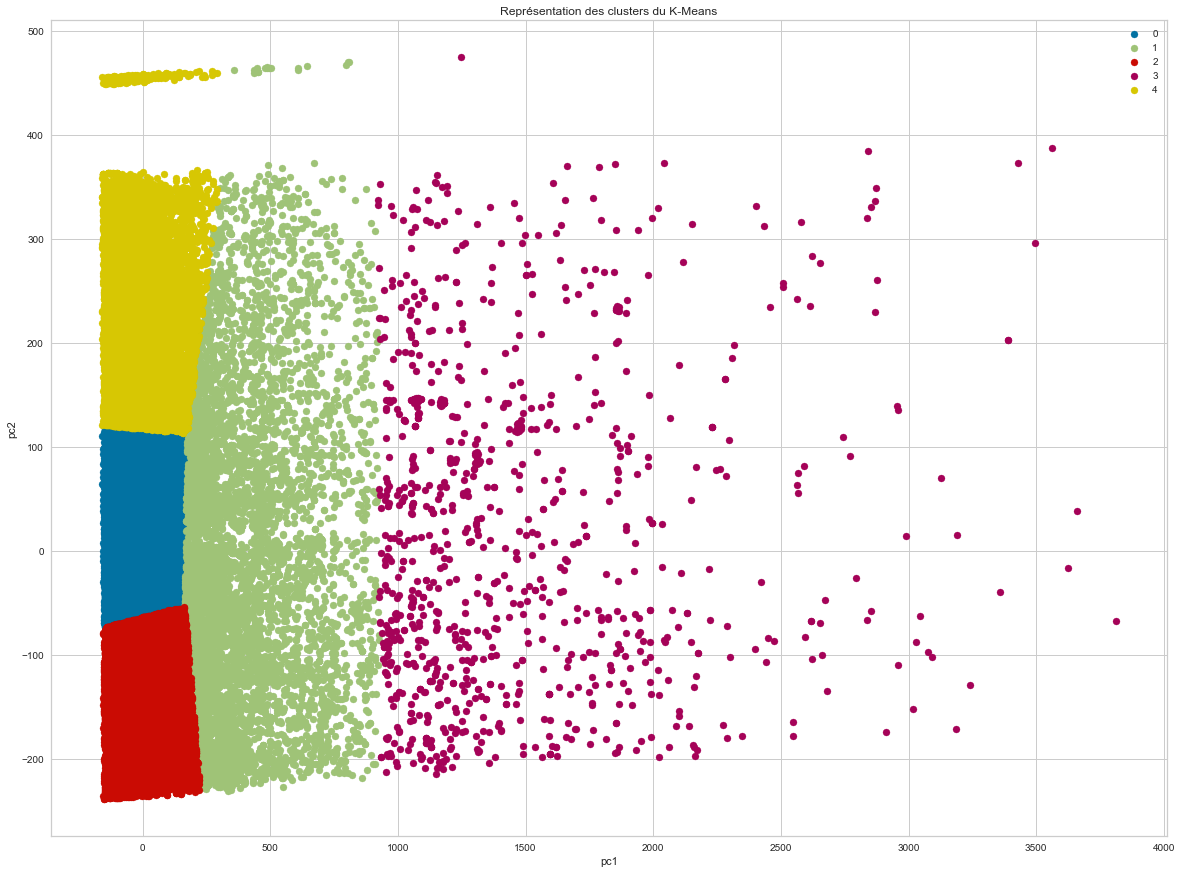

C:\Users\cedri\AppData\Local\Temp/ipykernel_19660/4034682741.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N° Cluster"] = model.labels_


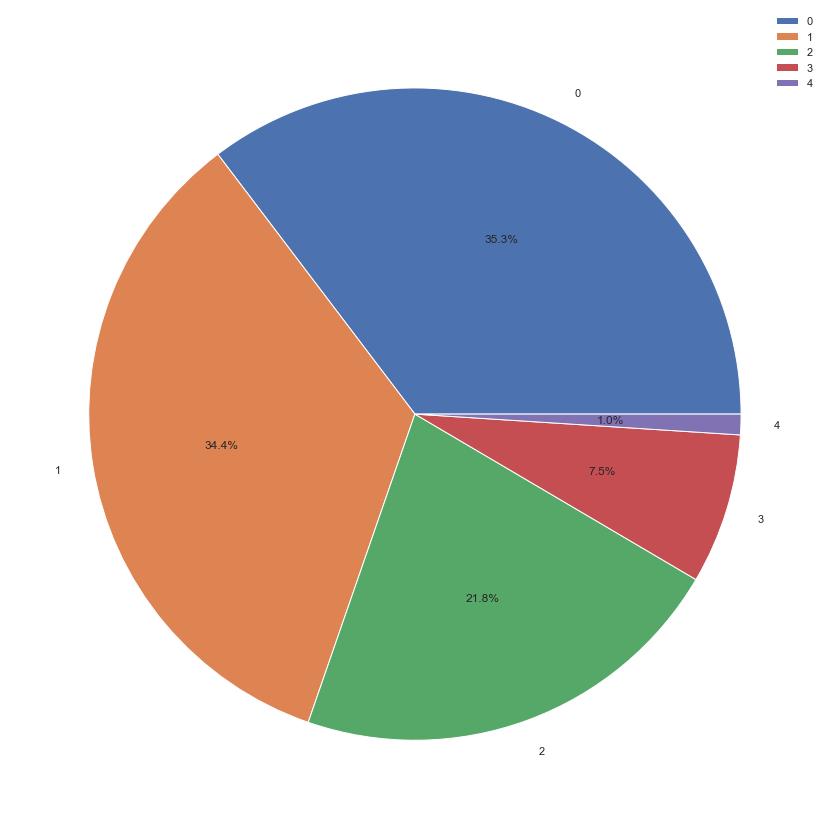

In [24]:
Data_RFM_5, data_clusters_5, Data_custer_count_5 = Vizualisation_KM (Data_RFM, 5, PCA_RFM, 0, 1) 

La classe 1 compose 50% de toutes les données et la classe  4 compose environ 37% de toutes nos données. Le classe 2 représente seulement 0.4% de nos données.

In [25]:
Data_RFM_5.head(3)

,Recency,Frequency,Payment by customer,N° Cluster
0,332,2,82.82,0
1,36,1,141.46,2
2,22,1,179.12,2


In [26]:
data_clusters_5 

,Recency,Frequency,Payment by customer
N° Cluster,,,
0,254.86,1.05,114.92
1,223.56,1.24,558.54
2,86.42,1.06,123.29
3,232.31,1.20,1626.85
4,457.76,1.05,123.22


Le cluster 0 est composé d'une population avec des paiments par clients assez bas et une recence moyenne.

Le cluster 1 est composé des clients avec une faible récence, une faible fréquence et un faible paiment par client.

Le cluster 2 correspond aux clients qui ont beaucoup dépensé.

Le cluster 3 correspond aux clients qui achète avec une fréquence élevé.

Le cluser 4 correspond aux clients avec une recence élevé.

In [27]:
Data_custer_count_5 

,N° Cluster,Population
0,2,33560
1,0,32648
2,4,20742
3,1,7078
4,3,967


La classe 2 est composé d'une population de 338 qui est inférieur à 500. Du point de métier il n'est pas intéressant d'avoir un cluster avec si peu de population.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Représentation de la séparation des données du K-means via T-SNE avec 3 features et 5 clusters '}>

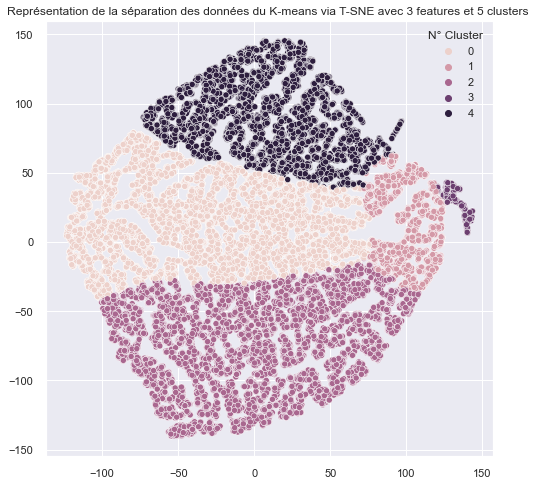

In [28]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(Data_RFM_5[:50000])
plt.figure(figsize=(8,8))
plt.title('Représentation de la séparation des données du K-means via T-SNE avec 3 features et 5 clusters ')
sns.scatterplot(T[:,0], T[:,1], Data_RFM_5["N° Cluster"][:50000])

On utilise une TSNE pour mieux visualiser nos clusters.

## Test avec 4 clusters

On test avec 4 clusters.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


le temps du fit est 0.6634968999999842 s


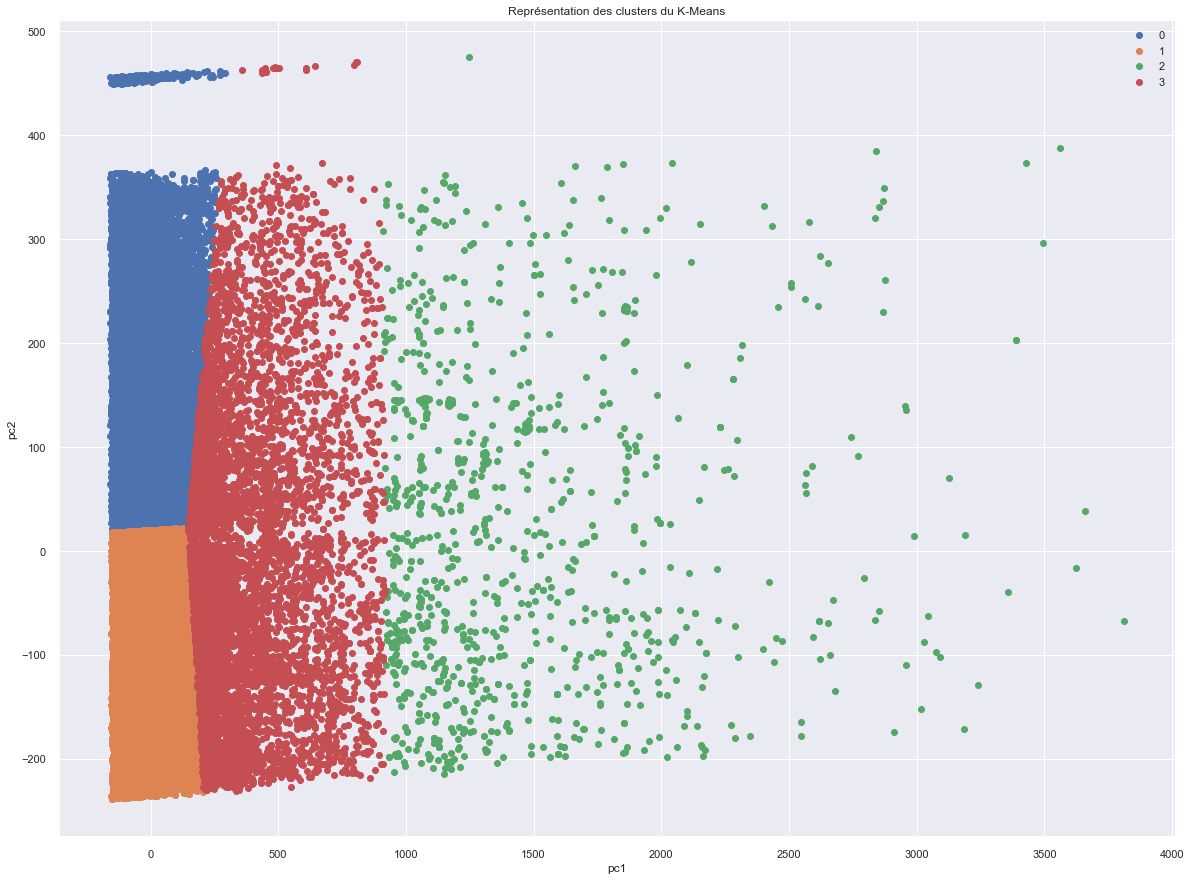

C:\Users\cedri\AppData\Local\Temp/ipykernel_19660/4034682741.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N° Cluster"] = model.labels_


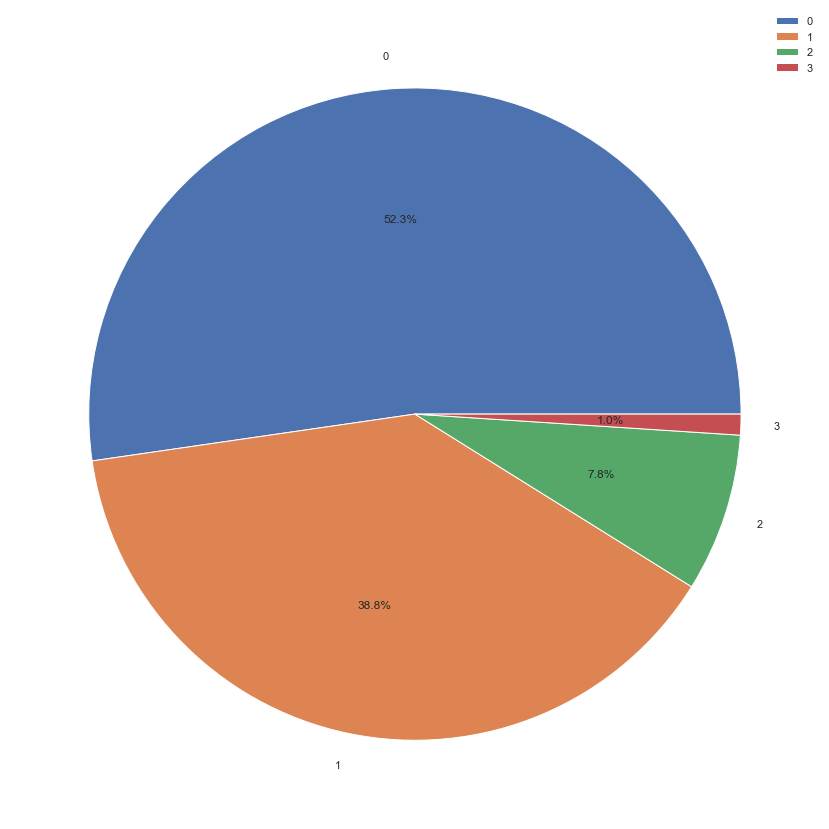

In [29]:
Data_RFM_4, data_clusters_4, Data_custer_count_4 = Vizualisation_KM (Data_RFM, 4, PCA_RFM, 0, 1) 

In [30]:
data_clusters_4

,Recency,Frequency,Payment by customer
N° Cluster,,,
0,388.08,1.05,119.33
1,127.16,1.05,118.87
2,233.33,1.19,1620.25
3,223.11,1.24,547.17


Le cluster 0 correspond aux clients avec une faible recence et un faible paiement par client.

Le cluster 1 correspond aux clients avec une fréquence élevé

Le cluster 2 correspond aux clients avec une récence élevé.

Le cluster 3 correspond aux clients avec un paiement très élevé.

In [31]:
Data_custer_count_4

,N° Cluster,Population
0,1,49676
1,0,36885
2,3,7455
3,2,979


On a des clusters avec des populations supérieurs à 500 clients.

C:\Users\cedri\AppData\Local\Temp/ipykernel_19660/3266409633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_RFM_4["ID"] = Data_RFM.index


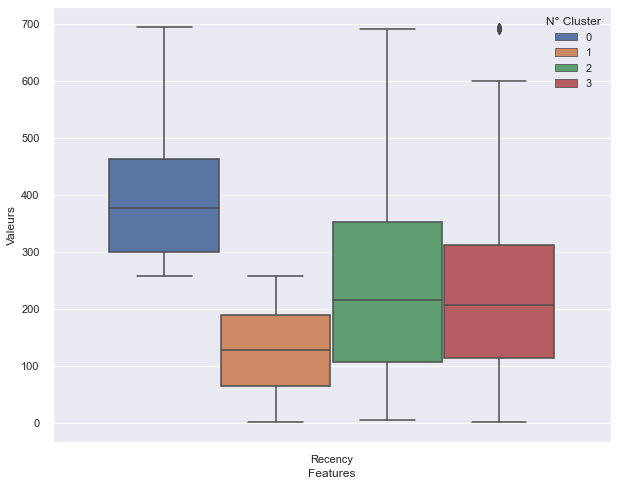

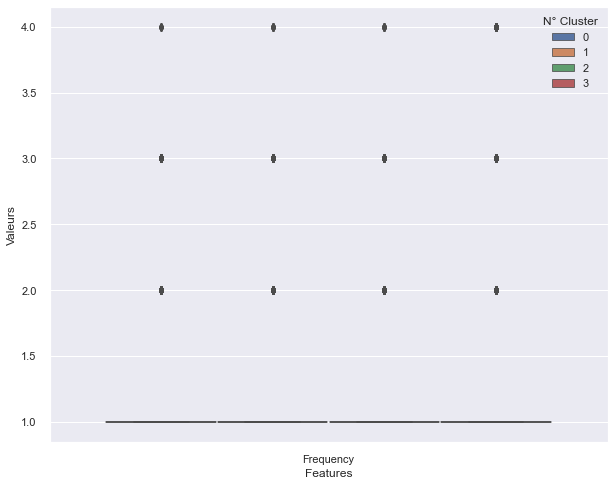

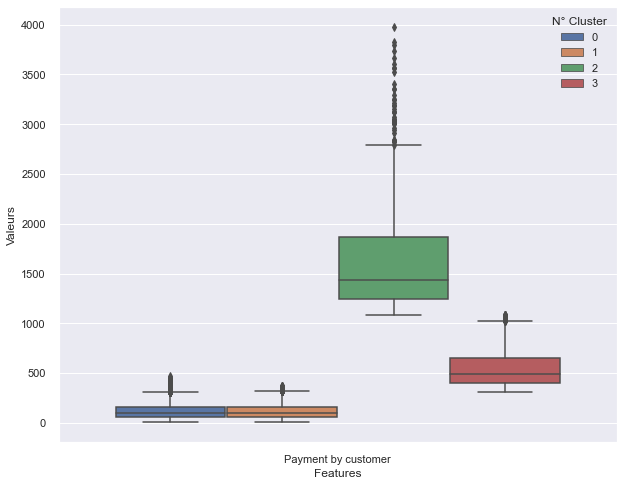

In [32]:
Data_RFM_4["ID"] = Data_RFM.index

for var in ["Recency", "Frequency",'Payment by customer'] :
    Data_Cluser_Plot = pd.melt(Data_RFM_4.reset_index(),
                          id_vars=["ID", "N° Cluster"],
                          value_vars=[var],
                          var_name="Features",
                          value_name="Valeurs")
    plt.figure(figsize=(10,8))
    sns.boxplot(y='Valeurs', x='Features', hue="N° Cluster", data= Data_Cluser_Plot )



Le modèle à 3 variables est très bien mais on va essayer d'avoir plus de variables. Car il est intéressant d'avoir autant de clusters que de variables.

# Test 4 features

On test maintenant avec 4 features. On rajoute la feature "review score".

In [33]:
colonnes_clus = ['Recency', 'Frequency', 'Payment by customer',"review_score"]

Mean:
 Recency                237.09
Frequency                1.07
Payment by customer    168.13
review_score             4.17
dtype: float64


Standard Deviation:
  Recency                152.48
Frequency                0.28
Payment by customer    213.75
review_score             1.27
dtype: float64
Explaind Variance
[6.62821416e-01 3.37154098e-01 2.33513817e-05 1.13419405e-06]
1.0000000000000002


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\clust

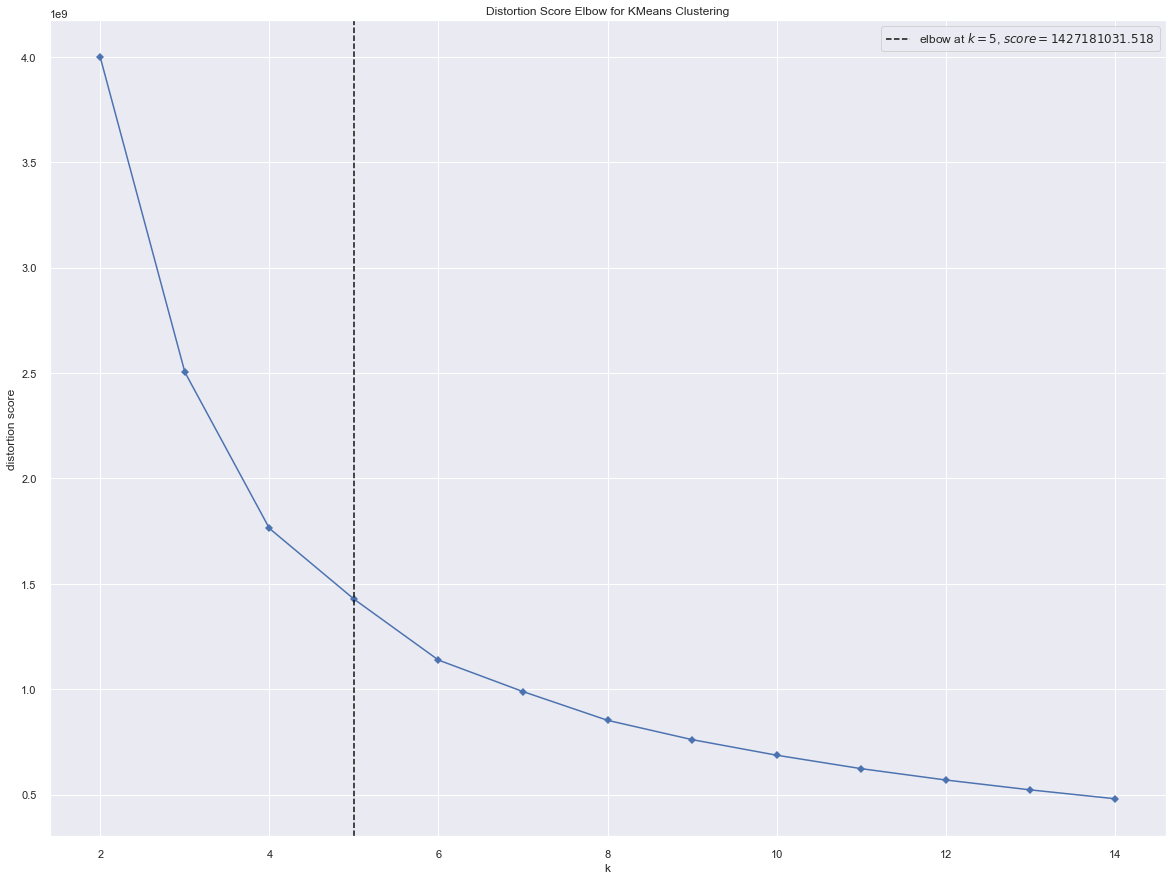

In [34]:
Data_4_Feat , pca, pcs, PCA_RFM = std_scaler(Data, colonnes_clus)
func_clustering (Data_4_Feat, model_KM, (2, 15))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


le temps du fit est 0.7496396999999888 s


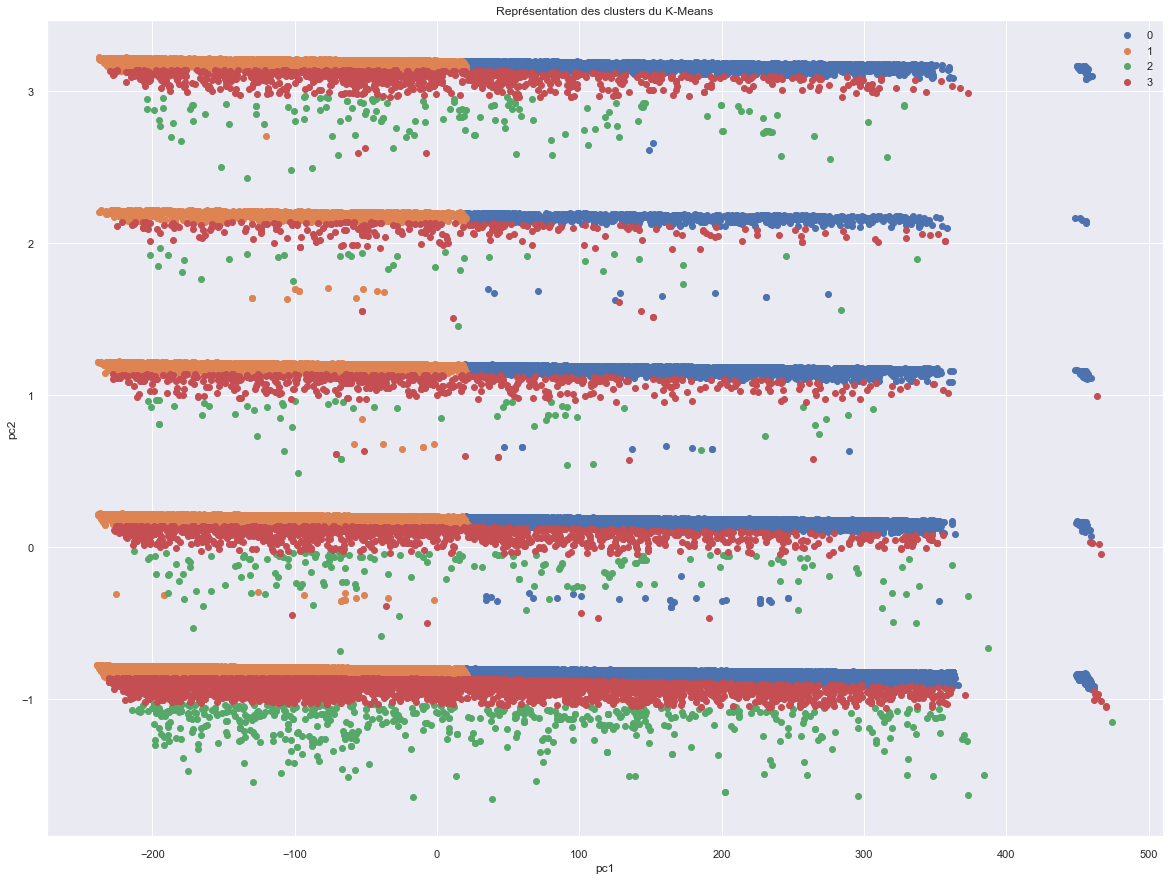

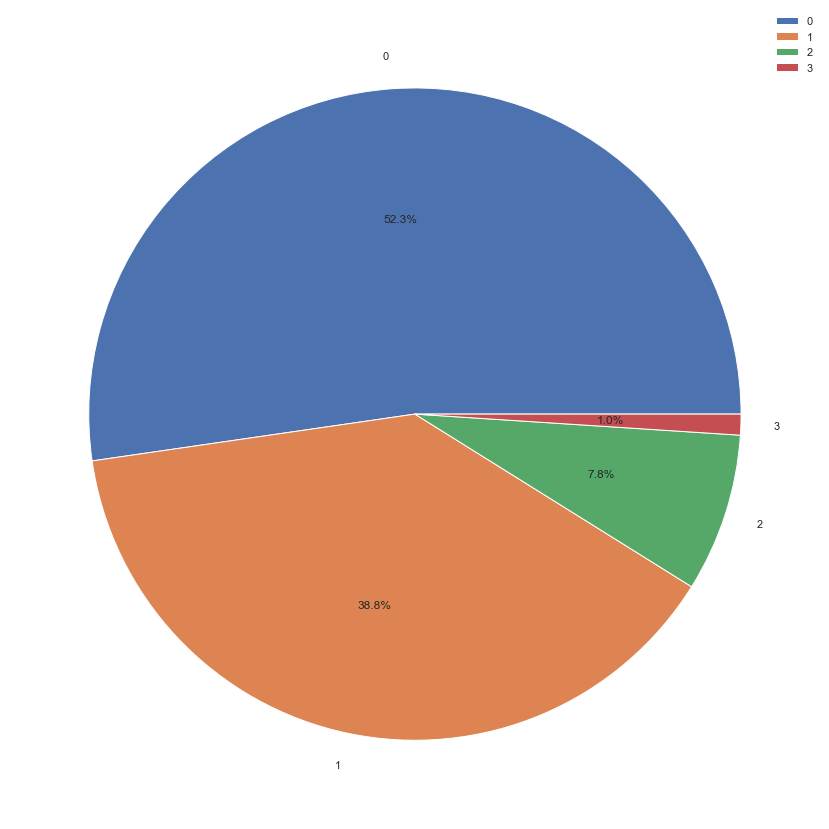

In [35]:
Data_4_F, Data_4_Feat_cluster, Data_4_Feat_count = Vizualisation_KM (Data_4_Feat , 4, PCA_RFM, 1, 2) 

In [36]:
Data_4_F

,Recency,Frequency,Payment by customer,review_score,N° Cluster
0,332,2,82.82,4.0,0
1,36,1,141.46,4.0,1
2,22,1,179.12,5.0,1
3,284,1,72.20,5.0,0
4,197,1,28.62,5.0,1
...,...,...,...,...,...
94990,539,1,85.08,5.0,0
94991,205,1,195.00,4.0,1
94992,368,1,271.01,5.0,0
94993,233,1,441.16,2.0,3


In [37]:
Data_4_F

,Recency,Frequency,Payment by customer,review_score,N° Cluster
0,332,2,82.82,4.0,0
1,36,1,141.46,4.0,1
2,22,1,179.12,5.0,1
3,284,1,72.20,5.0,0
4,197,1,28.62,5.0,1
...,...,...,...,...,...
94990,539,1,85.08,5.0,0
94991,205,1,195.00,4.0,1
94992,368,1,271.01,5.0,0
94993,233,1,441.16,2.0,3


In [38]:
Data_4_Feat_cluster   = Data_4_F.groupby('N° Cluster').agg({'Recency' : "mean", 'Frequency' : "mean",'Payment by customer': "mean",'review_score': "mean"}).round(2)
Data_4_Feat_cluster.reset_index()

,N° Cluster,Recency,Frequency,Payment by customer,review_score
0,0,388.08,1.05,119.33,4.19
1,1,127.16,1.05,118.87,4.18
2,2,233.33,1.19,1620.25,4.02
3,3,223.11,1.24,547.17,4.04


Cluster 0 : Les recency élevées et fréquences faibles.

Cluster 1 : Les récences faibles et fréquences faibles.

Cluster 2 : Les paiments élevés.

Cluster 3 : Les  fréquences élevées et les review faibles.

In [39]:
Data_4_Feat_cluster  

,Recency,Frequency,Payment by customer,review_score
N° Cluster,,,,
0,388.08,1.05,119.33,4.19
1,127.16,1.05,118.87,4.18
2,233.33,1.19,1620.25,4.02
3,223.11,1.24,547.17,4.04


In [40]:
Data_4_Feat_count

,N° Cluster,Population
0,1,49676
1,0,36885
2,3,7455
3,2,979


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Représentation de la séparation des données du K-means via T-SNE avec 4 features et 4 clusters'}>

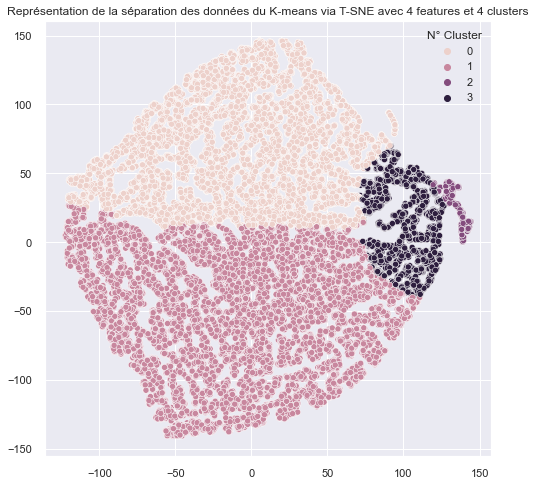

In [41]:
T = tsne.fit_transform(Data_4_F[:60000])
plt.figure(figsize=(8,8))
plt.title('Représentation de la séparation des données du K-means via T-SNE avec 4 features et 4 clusters')
sns.scatterplot(T[:,0], T[:,1], Data_4_F["N° Cluster"][:60000])

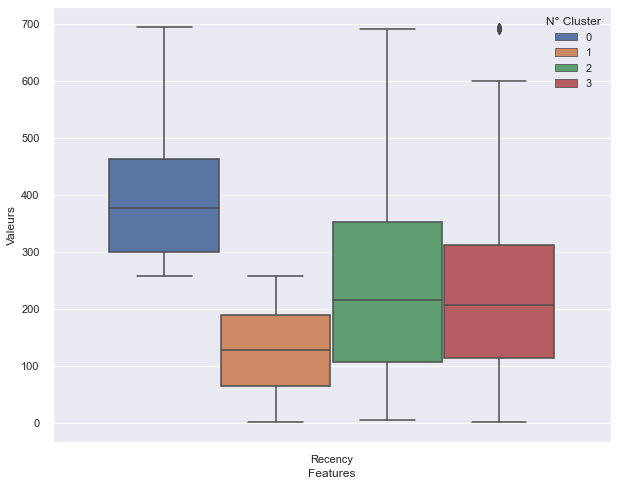

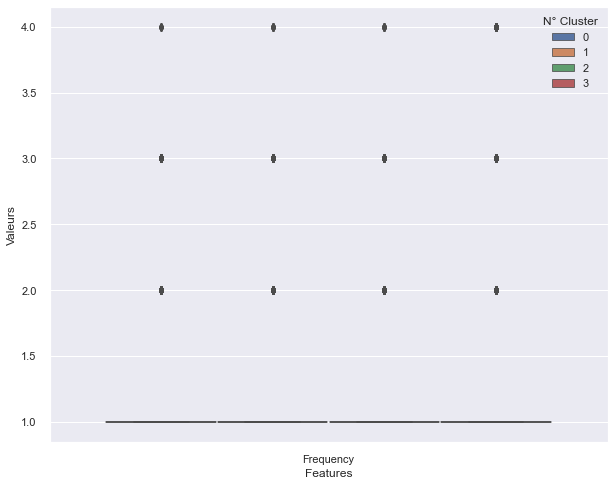

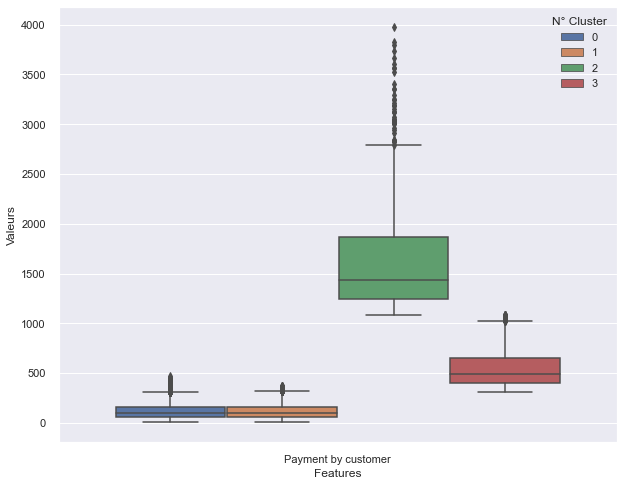

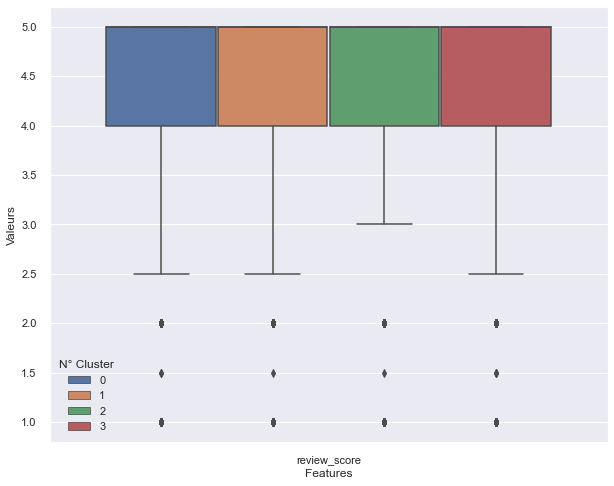

In [42]:
Data_4_F["ID"] = Data_4_F.index
for var in colonnes_clus :
    Data_Cluser_Plot = pd.melt(Data_4_F.reset_index(),
                          id_vars=["ID", "N° Cluster"],
                          value_vars=[var],
                          var_name="Features",
                          value_name="Valeurs")
    plt.figure(figsize=(10,8))
    sns.boxplot(y='Valeurs', x='Features', hue="N° Cluster", data= Data_Cluser_Plot )



Le modèle à 4 variables est très interessants. On va regarder à 5 variables pour voir s'il y a de meilleurs clusters.

## Test plus de clusters

On rajoute la feature "nombre de jours avant livraison".

In [43]:
colonnes_clusters_plus = [
                            'Recency', 
                            'Frequency', 
                            'Payment by customer',
                            "review_score",
                            "nb_days_before_delivered"

]

Mean:
 Recency                     237.09
Frequency                     1.07
Payment by customer         168.13
review_score                  4.17
nb_days_before_delivered     11.23
dtype: float64


Standard Deviation:
  Recency                     152.48
Frequency                     0.28
Payment by customer         213.75
review_score                  1.27
nb_days_before_delivered      7.93
dtype: float64
Explaind Variance
[6.62221934e-01 3.36857063e-01 8.99066457e-04 2.08036750e-05
 1.13311867e-06]
0.9999999999999999


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\clust

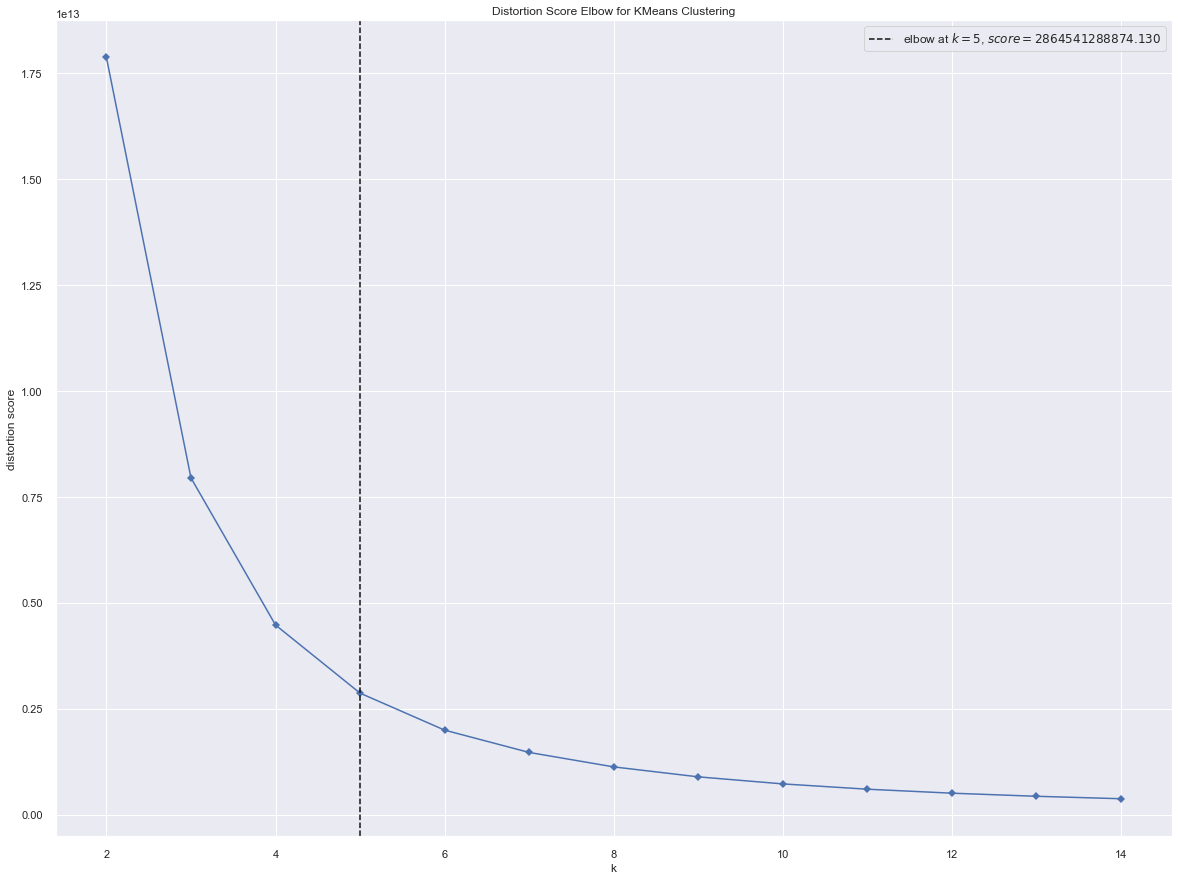

In [44]:
Data_5_Feat , pca, pcs, PCA_RFM = std_scaler(Data, colonnes_clusters_plus )
func_clustering (Data_4_Feat, model_KM, (2, 15))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


le temps du fit est 0.6686579000000279 s


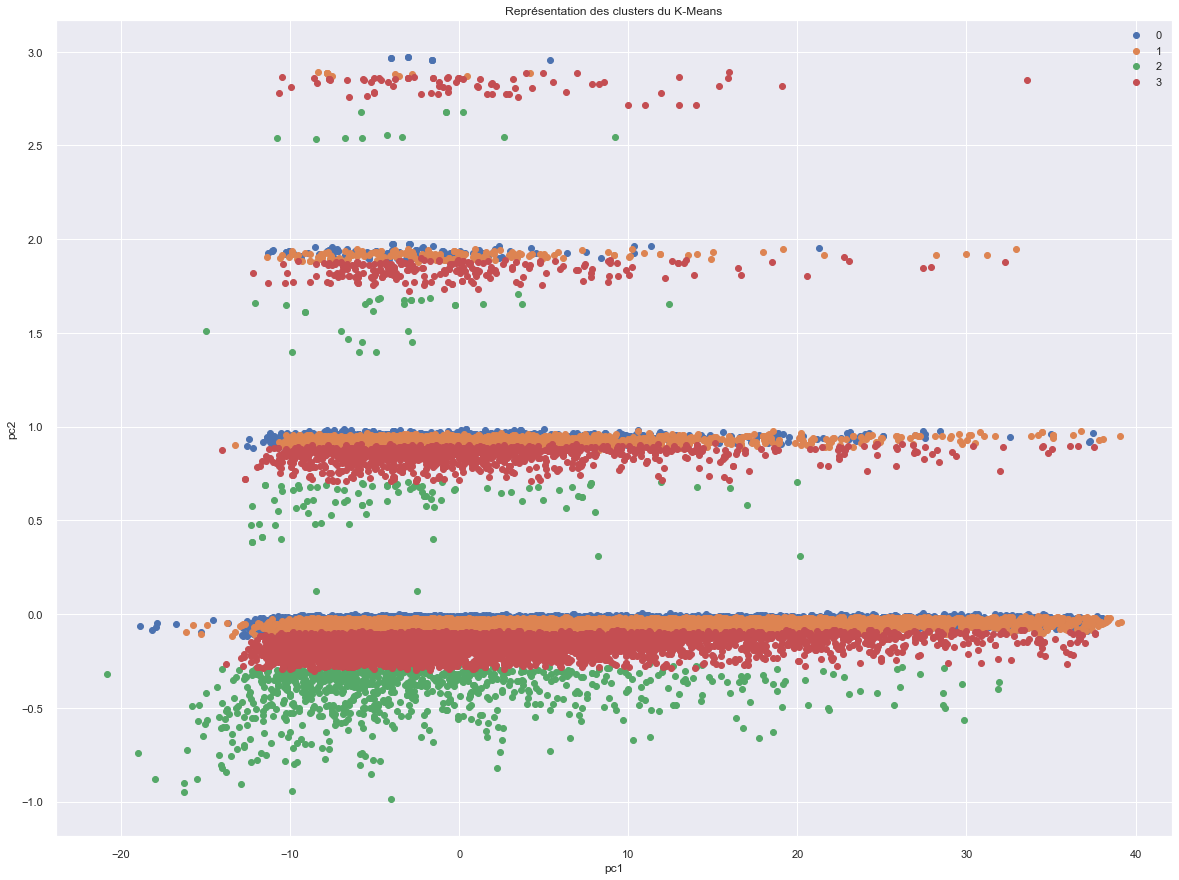

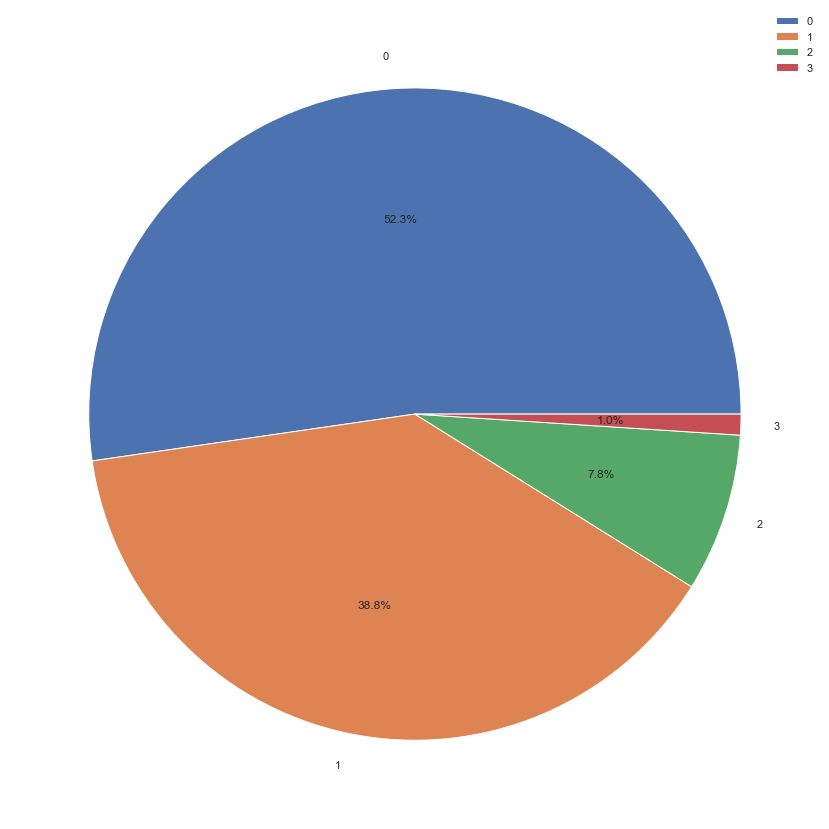

In [45]:
Data_5_F, Data_5_Feat_cluster, Data_5_Feat_count = Vizualisation_KM (Data_5_Feat , 4, PCA_RFM, 2, 4) 

In [46]:
Data_5_Feat_cluster  = Data_5_F.groupby('N° Cluster').agg({'Recency' : "mean", 'Frequency' : "mean",'Payment by customer': "mean",'review_score': "mean", "nb_days_before_delivered" :"mean"}).round(2)
Data_5_Feat_cluster.reset_index()

,N° Cluster,Recency,Frequency,Payment by customer,review_score,nb_days_before_delivered
0,0,388.08,1.05,119.33,4.19,11.52
1,1,127.16,1.05,118.87,4.18,10.75
2,2,233.33,1.19,1620.25,4.02,12.56
3,3,223.12,1.24,547.20,4.04,12.73


In [47]:
Data_5_Feat_cluster

,Recency,Frequency,Payment by customer,review_score,nb_days_before_delivered
N° Cluster,,,,,
0,388.08,1.05,119.33,4.19,11.52
1,127.16,1.05,118.87,4.18,10.75
2,233.33,1.19,1620.25,4.02,12.56
3,223.12,1.24,547.20,4.04,12.73


Les clusters sont similaires aux clusters avec 4 features.

In [48]:
Data_5_Feat_count

,N° Cluster,Population
0,1,49677
1,0,36885
2,3,7454
3,2,979


In [49]:
Data_5_F[:20000]

,Recency,Frequency,Payment by customer,review_score,nb_days_before_delivered,N° Cluster
0,332,2,82.82,4.0,8,0
1,36,1,141.46,4.0,12,1
2,22,1,179.12,5.0,9,1
3,284,1,72.20,5.0,13,0
4,197,1,28.62,5.0,2,1
...,...,...,...,...,...,...
19995,380,1,421.18,5.0,2,3
19996,492,1,135.24,3.0,14,0
19997,469,1,57.68,4.0,1,0
19998,11,1,79.51,5.0,4,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Représentation de la séparation des données du K-means via T-SNE avec 5 features et 4 clusters'}>

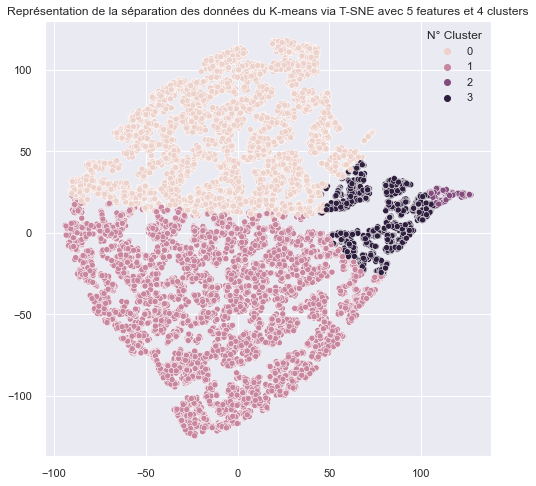

In [50]:
T = tsne.fit_transform(Data_5_F[:20000])
plt.figure(figsize=(8,8))
plt.title('Représentation de la séparation des données du K-means via T-SNE avec 5 features et 4 clusters')
sns.scatterplot(T[:,0], T[:,1], Data_5_F["N° Cluster"][:20000])

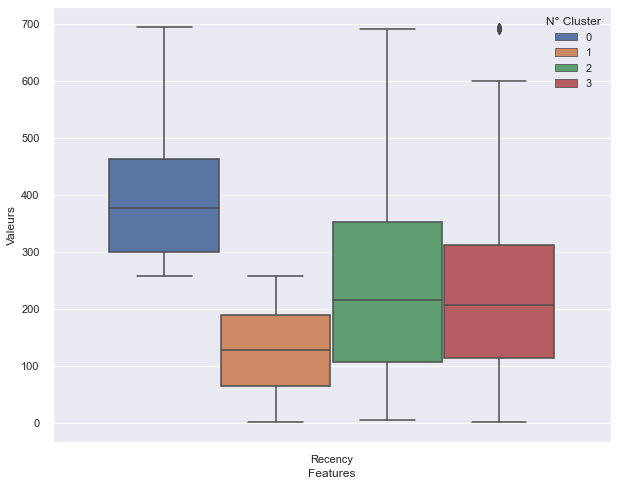

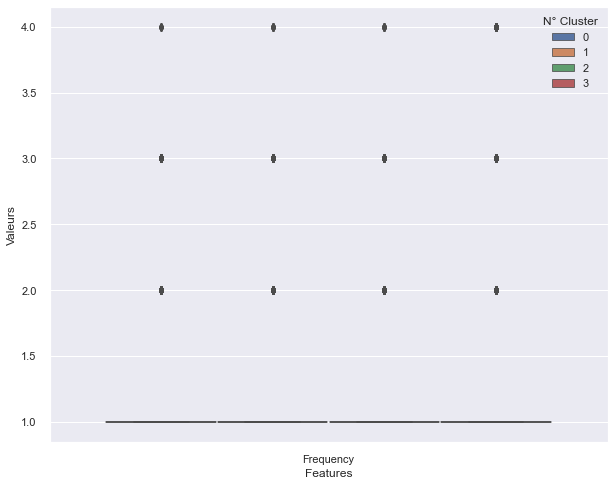

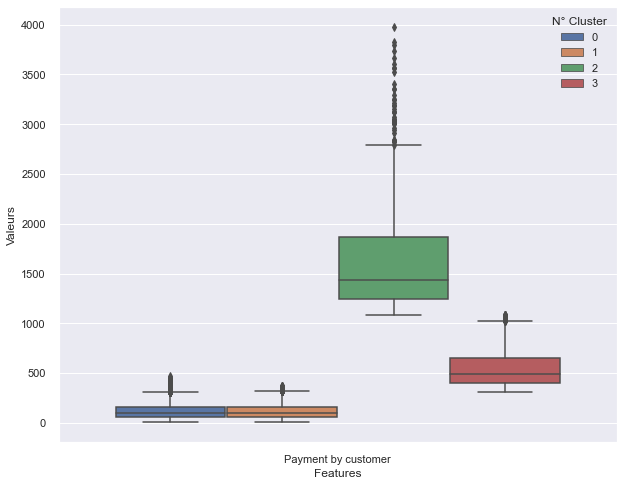

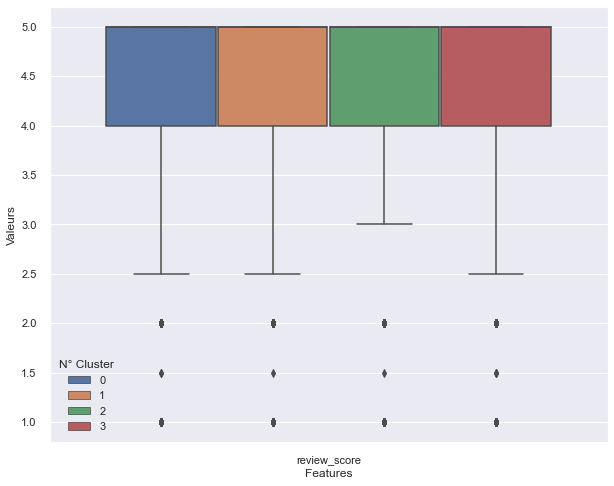

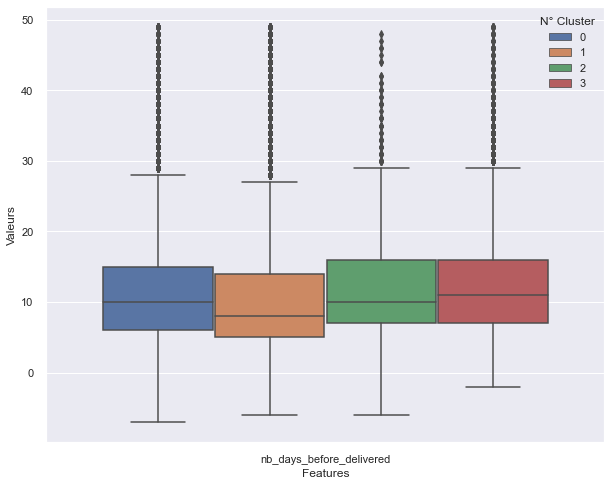

In [51]:
Data_5_F["ID"] = Data_5_F.index
for var in colonnes_clusters_plus :
    Data_Cluser_Plot = pd.melt(Data_5_F.reset_index(),
                          id_vars=["ID", "N° Cluster"],
                          value_vars=[var],
                          var_name="Features",
                          value_name="Valeurs")
    plt.figure(figsize=(10,8))
    sns.boxplot(y='Valeurs', x='Features', hue="N° Cluster", data= Data_Cluser_Plot )

Pour la suite du projet nous allons partir sur 4 features car cela donnera plus de précision à nos clusters. On retient le modèle K-Means à 4 clusters et 4 features.

## Test DBSCAN

On essaye un nouveau modèle de clustering DBSCAN. On fait des test avec 4 features.

In [52]:
Data_ = Data_5_F[colonnes_clus].copy() 

In [53]:
model_db = DBSCAN(eps= 2, min_samples =100 )

In [54]:
Data_DB = model_db .fit(Data_ )

In [55]:
Data_ ["Db Clust"] = model_db.labels_

In [56]:
Data_ ["Db Clust"].value_counts()

-1    94995
Name: Db Clust, dtype: int64

On effectue des tests avec DBSCAN avec plusieurs Epsilon.

## EPS = 1

On test le modèle avec Epsilon = 1 

Graphique TSNE de l'algo DBSCAN pour un eps = 1


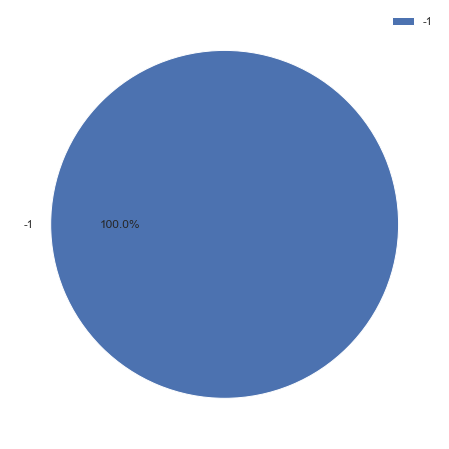

In [57]:
# print("==========================")
print("Graphique TSNE de l'algo DBSCAN pour un eps = 1")
sns.set(rc = {'figure.figsize':(10,8)})
Data_ = Data_5_F[colonnes_clusters_plus].copy() 
model_db = DBSCAN(eps= 1, min_samples =100 )
Data_DB = model_db .fit(Data_ )
Data_ ["Db Clust"] = model_db.labels_
Data_PIE = pd.DataFrame(data = Data_ ["Db Clust"].value_counts()).reset_index()
Data_PIE.columns = ["N° Cluster","Population"]
plt.pie(x = "Population", data= Data_PIE ,autopct="%.1f%%", labels = Data_PIE["N° Cluster"] )
plt.legend()
   


On obtient une classe composant 100% des données.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'DBSCAN via T-SNE pour différents EPS'}>

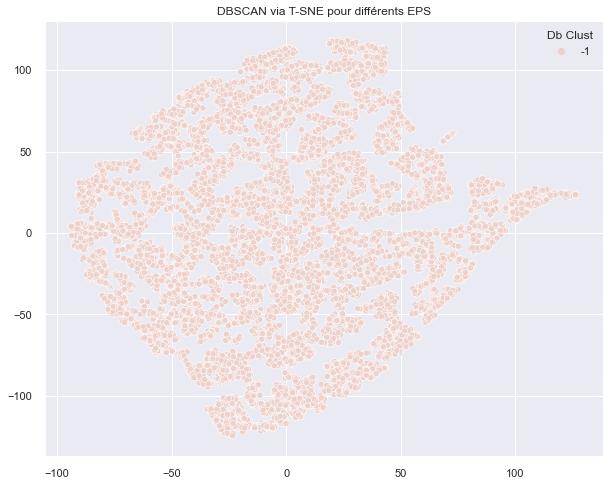

In [58]:
plt.figure(figsize=(10,8))
##Data_ ["Db Clust"].value_counts().plot(kind='pie')
T = tsne.fit_transform(Data_[:20000])
plt.title('DBSCAN via T-SNE pour différents EPS')
sns.scatterplot(T[:,0], T[:,1], Data_["Db Clust"][:20000])

## EPS = 50  

On test le modèle DBSCAN avec EPS = 50.

Graphique TSNE de l'algo DBSCAN pour un eps = 50


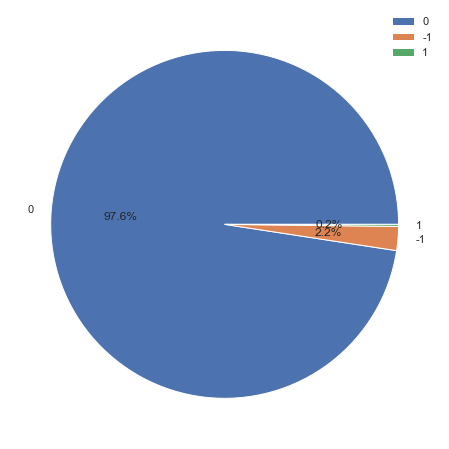

In [59]:
print("==========================")
print("Graphique TSNE de l'algo DBSCAN pour un eps = 50")
sns.set(rc = {'figure.figsize':(10,8)})
Data_ = Data_5_F[colonnes_clusters_plus].copy() 
model_db = DBSCAN(eps= 50, min_samples =100 )
Data_DB = model_db .fit(Data_ )
Data_ ["Db Clust"] = model_db.labels_
Data_PIE = pd.DataFrame(data = Data_ ["Db Clust"].value_counts()).reset_index()
Data_PIE.columns = ["N° Cluster","Population"]
plt.pie(x = "Population", data= Data_PIE ,autopct="%.1f%%", labels = Data_PIE["N° Cluster"] )
plt.legend()
   

On obtient une classe qui compose 97% des données. Et deux autres classes minoritaires.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'DBSCAN via T-SNE pour différents EPS =50'}>

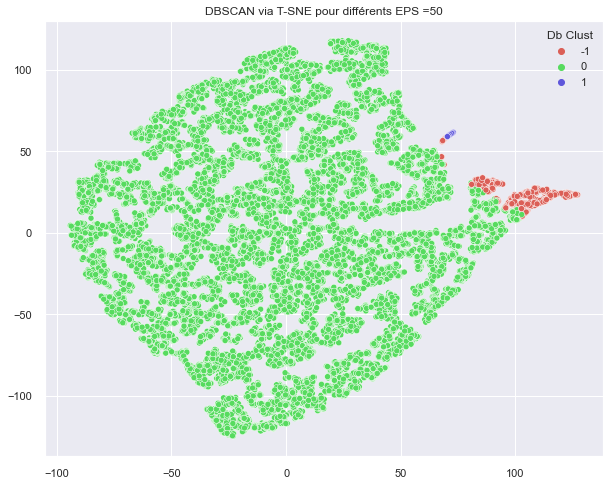

In [60]:
plt.figure(figsize=(10,8))
##Data_ ["Db Clust"].value_counts().plot(kind='pie')
T = tsne.fit_transform(Data_[:20000])
plt.title('DBSCAN via T-SNE pour différents EPS =50')
sns.scatterplot(T[:,0], T[:,1], Data_["Db Clust"][:20000],legend='full', palette=sns.color_palette("hls",3))

## EPS = 80

On effectue un test Epsilon = 80.

Graphique TSNE de l'algo DBSCAN pour un eps = 80


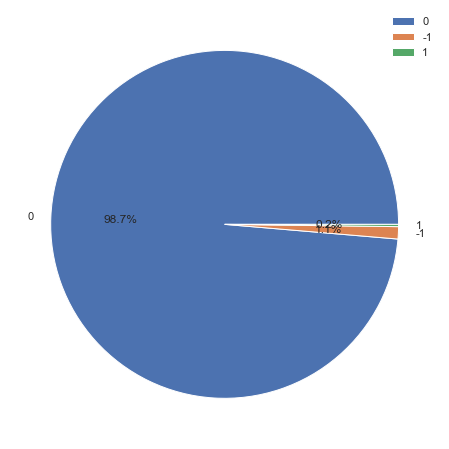

In [61]:
print("==========================")
print("Graphique TSNE de l'algo DBSCAN pour un eps = 80")
sns.set(rc = {'figure.figsize':(10,8)})
Data_ = Data_5_F[colonnes_clusters_plus].copy() 
model_db = DBSCAN(eps= 80, min_samples =100 )
Data_DB = model_db .fit(Data_ )
Data_ ["Db Clust"] = model_db.labels_
Data_PIE = pd.DataFrame(data = Data_ ["Db Clust"].value_counts()).reset_index()
Data_PIE.columns = ["N° Cluster","Population"]
plt.pie(x = "Population", data= Data_PIE ,autopct="%.1f%%", labels = Data_PIE["N° Cluster"] )
plt.legend()
   

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'DBSCAN via T-SNE pour différents EPS = 80'}>

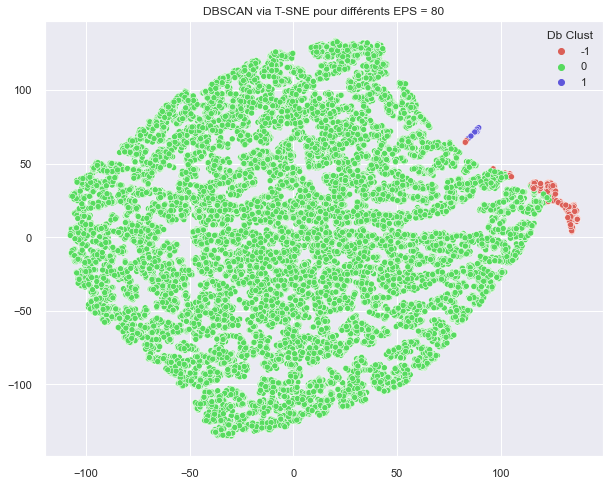

In [62]:
plt.figure(figsize=(10,8))
##Data_ ["Db Clust"].value_counts().plot(kind='pie')
T = tsne.fit_transform(Data_[:40000])
plt.title('DBSCAN via T-SNE pour différents EPS = 80')
sns.scatterplot(T[:,0], T[:,1], Data_["Db Clust"][:40000],legend='full', palette=sns.color_palette("hls",3))

On obtient une classe majoritaire à 98% des données.

### EPS = 100 

Graphique TSNE de l'algo DBSCAN pour un eps = 100 


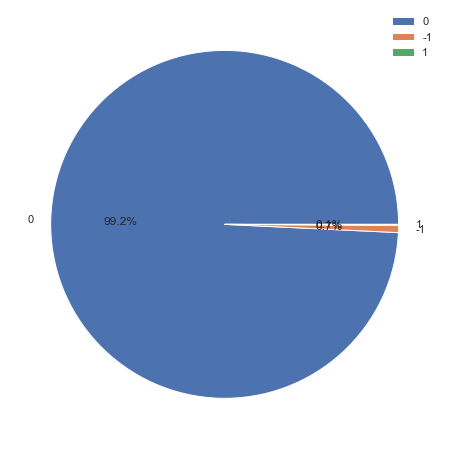

In [63]:
print("==========================")
print("Graphique TSNE de l'algo DBSCAN pour un eps = 100 ")
sns.set(rc = {'figure.figsize':(10,8)})
Data_ = Data_5_F[colonnes_clusters_plus].copy() 
model_db = DBSCAN(eps= 100, min_samples =100 )
Data_DB = model_db .fit(Data_ )
Data_ ["Db Clust"] = model_db.labels_
Data_PIE = pd.DataFrame(data = Data_ ["Db Clust"].value_counts()).reset_index()
Data_PIE.columns = ["N° Cluster","Population"]
plt.pie(x = "Population", data= Data_PIE ,autopct="%.1f%%", labels = Data_PIE["N° Cluster"] )
plt.legend()
   

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'DBSCAN via T-SNE pour différents EPS = 100 '}>

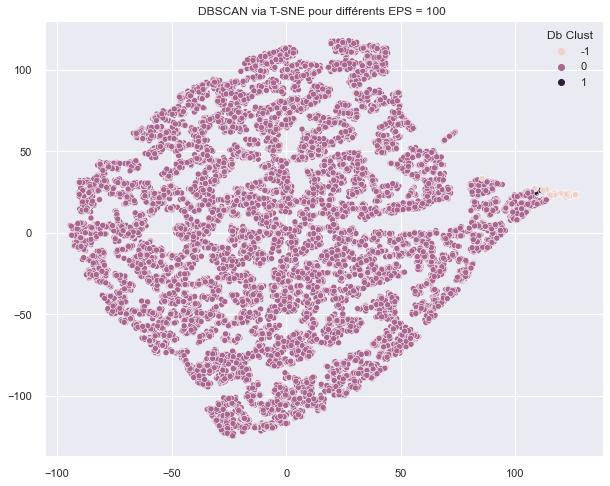

In [65]:
plt.figure(figsize=(10,8))
##Data_ ["Db Clust"].value_counts().plot(kind='pie')
T = tsne.fit_transform(Data_[:20000])
plt.title('DBSCAN via T-SNE pour différents EPS = 100 ')
sns.scatterplot(T[:,0], T[:,1], Data_["Db Clust"][:20000],legend='full')


Pour l'algorithme DBSCAN On obtient des donnnées avec une classe composant plus de 97% des données. L'algorithme fait des clusters en fonction de la densité. Il recense les clients avec une commande dans la classe majoritaire des données et prend en compte dans les clusters en minorités les classes avec plus d'une commande. L'algorithme DBSCAN n'est pas pertinent.

## AgglomerativeClustering

On souhaite à présent tester l'algorithe AGGLOmerative clustering.

In [66]:
Data_ = Data_5_F[colonnes_clusters_plus].copy() 
Model_AGClusterd = AgglomerativeClustering(n_clusters=4, affinity='deprecated', metric="euclidean" )
Data_C = Data_[:40000]
training_start = time.perf_counter()
AGC = Model_AGClusterd.fit(Data_C)
training_end = time.perf_counter() 

print("Le temps de fit est", training_end - training_start,"s")



Le temps de fit est 212.12071359999982 s


Le temps de fit de l'agglorithme est bien plus élevé que l'algorithme Kmeans (0.6s le temps de fit) Contre 134 s de fit pour seulement 40 000 éléments de données. 

In [67]:
T = tsne.fit_transform(Data_[:40000])

In [68]:
Data_AGGClust  = pd.DataFrame(data = [T[:,0], T[:,1],Model_AGClusterd.labels_] ).T
Data_AGGClust .columns = ['X', 'Y', 'N° Clusters']

In [69]:
Data_AGGClust

,X,Y,N° Clusters
0,-36.387150,48.796654,0.0
1,39.219162,-91.271935,2.0
2,60.873814,-83.154533,2.0
3,-55.242218,33.167763,0.0
4,-103.928154,-24.857607,2.0
...,...,...,...
39995,25.844393,-6.577689,2.0
39996,56.021679,13.902408,0.0
39997,-10.236933,30.638880,0.0
39998,73.874985,17.774994,2.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Représentation T-SNE de Agglomerative Clustering avec 4 clusters'}, xlabel='X', ylabel='Y'>

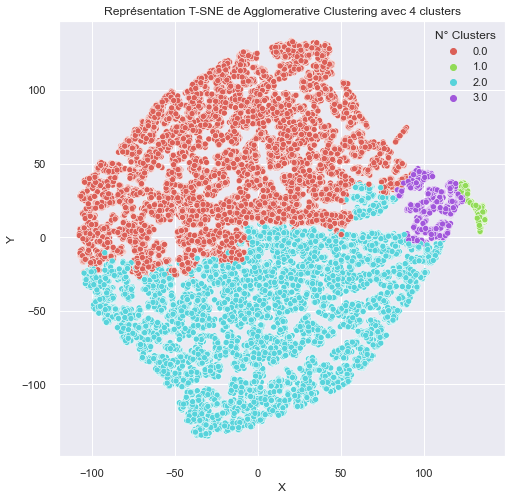

In [70]:
plt.figure(figsize=(8,8))
plt.title('Représentation T-SNE de Agglomerative Clustering avec 4 clusters')
sns.scatterplot(Data_AGGClust["X"], 
                Data_AGGClust["Y"],
               Data_AGGClust["N° Clusters"],
                legend='full',
               palette=sns.color_palette("hls",4))

On obtient des résultats assez similaires au Kmeans. Mais l'algorithme Kmeans est beaucoup plus rapide à mettre en place que le Agglomerative Clustering. On retiendra l'algorithme de Kmeans pour la suite.